# 4x4 grid of graphs comparing depth errors and fractal roughness measures

**Chris Field April 2022**

In [1]:
import os  # operating system
import sys # to add src directory for my modules
#
import numpy as np
import math
import random
#
import pandas as pd
from scipy import stats
#
# Plotting requirements
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.font_manager # different fonts
from matplotlib import rcParams # runtime config to set fonts

In [2]:
# Using rcParams set the global fonts for Matplotlib
# Global parameters for Matplotlib: set font etc.
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Gill Sans MT']
rcParams['font.serif'] = ['Garamond']
rcParams['font.size'] = '16'
#

## Define Functions

In [3]:
# Shared variables:
colours = ['#1f77b4', '#ED1D24', '#1CEDAB', '#AC5678', '#896E2E']

In [4]:
def gamma_plot(gamma, start=1, title='Madogram', step = 1, file_out=False, location='./Plot/'):
    """
    Plot a list or array, e.g. variogram
    
    gamma -- intended to be the madogram, a list
    start -- start from lag start, int
    """
    gamm_trun = gamma[start:]
    x_init = np.arange(len(gamm_trun)) 
    x = x_init * step
    # plot
    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(1,1,1)

    ax.set_title(title)
    
    ax.set_xlabel('Separation (m)')
    ax.set_ylabel('madogram')
    
    ax.plot(x, gamm_trun, alpha =0.6, color='#1f77b4', solid_capstyle="butt", lw=3)

        # cosmetics
    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    plt.tight_layout()
    
    plt.show()
    
    if file_out:
        fig_name=location + title.replace(" ", "_") + '_madogram'  +'.png'
        fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight",quality=600)

# Input Data

In [5]:
location_out='./Output/Horizon_analysis/'

location_in = './Input_3/'

location_out_plots='./Pictures/Horizon_analysis_plots/'

# If necessary make output folders
    
if not os.path.exists(location_out_plots) :
    os.makedirs(location_out_plots)

# Load in and prepare data
* Note currently this data is stitched together by hand, should automate its creation.

In [6]:
# Read csv nDI format TBZ (event) ascii
df_input=pd.read_excel(location_in + 'ZOMBIE_35deg_std_and_horizon_metrics_handmade.xlsx')
# Remove quote marks from column names
df_input.columns=df_input.columns.str.replace('\"','')
# Some column names have trailing white space, remove this
df_input.columns=df_input.columns.str.replace('\s+','_')

In [7]:
# sort in reverse order of fractal dimention
df_input.sort_values(by='D_SV', ascending=False)

,Name,Seis_-_Actual_std,Slope_SV,Int_SV,D_SV,Slope_SV_seis,Int_SV_seis,D_SV_seis,Slope_M,Int_M,D_M,Slope_M_seis,Int_M_seis,D_M_seis
0,Spectral slope 1.92,5.335204,0.81,0.79,1.59,1.07,0.19,1.46,0.41,0.14,1.59,0.95,-0.61,1.05
1,Spectral slope 1.89,5.397981,0.83,0.77,1.59,1.12,0.14,1.44,0.42,0.13,1.58,0.97,-0.64,1.03
2,Pareto fault b 2.0,2.101643,1.56,-0.50,1.22,1.48,-0.67,1.26,0.79,-0.49,1.21,0.99,-0.85,1.01
3,Pareto fault b 1.5,2.283853,1.73,-0.40,1.13,1.73,-0.55,1.14,0.85,-0.40,1.15,0.98,-0.65,1.02
4,Sin,0.590122,1.83,-0.88,1.09,1.78,-0.84,1.11,1.00,-0.70,1.00,0.98,-0.68,1.02


In [8]:
df_input.head()

,Name,Seis_-_Actual_std,Slope_SV,Int_SV,D_SV,Slope_SV_seis,Int_SV_seis,D_SV_seis,Slope_M,Int_M,D_M,Slope_M_seis,Int_M_seis,D_M_seis
0,Spectral slope 1.92,5.335204,0.81,0.79,1.59,1.07,0.19,1.46,0.41,0.14,1.59,0.95,-0.61,1.05
1,Spectral slope 1.89,5.397981,0.83,0.77,1.59,1.12,0.14,1.44,0.42,0.13,1.58,0.97,-0.64,1.03
2,Pareto fault b 2.0,2.101643,1.56,-0.50,1.22,1.48,-0.67,1.26,0.79,-0.49,1.21,0.99,-0.85,1.01
3,Pareto fault b 1.5,2.283853,1.73,-0.40,1.13,1.73,-0.55,1.14,0.85,-0.40,1.15,0.98,-0.65,1.02
4,Sin,0.590122,1.83,-0.88,1.09,1.78,-0.84,1.11,1.00,-0.70,1.00,0.98,-0.68,1.02


In [9]:
df_input['Name'].to_list()

['Spectral slope 1.92',
 'Spectral slope 1.89',
 'Pareto fault b 2.0',
 'Pareto fault b 1.5',
 'Sin']

In [10]:
names  = [r'Spectral slope $\mathregular{\beta = 1.92}$',
 r'Spectral slope $\mathregular{\beta = 1.89}$',
 r'Pareto fault $\mathregular{c = 2.0}$',
 r'Pareto fault $\mathregular{c = 1.5}$',
 'Sin']

In [11]:
names

['Spectral slope $\\mathregular{\\beta = 1.92}$',
 'Spectral slope $\\mathregular{\\beta = 1.89}$',
 'Pareto fault $\\mathregular{c = 2.0}$',
 'Pareto fault $\\mathregular{c = 1.5}$',
 'Sin']

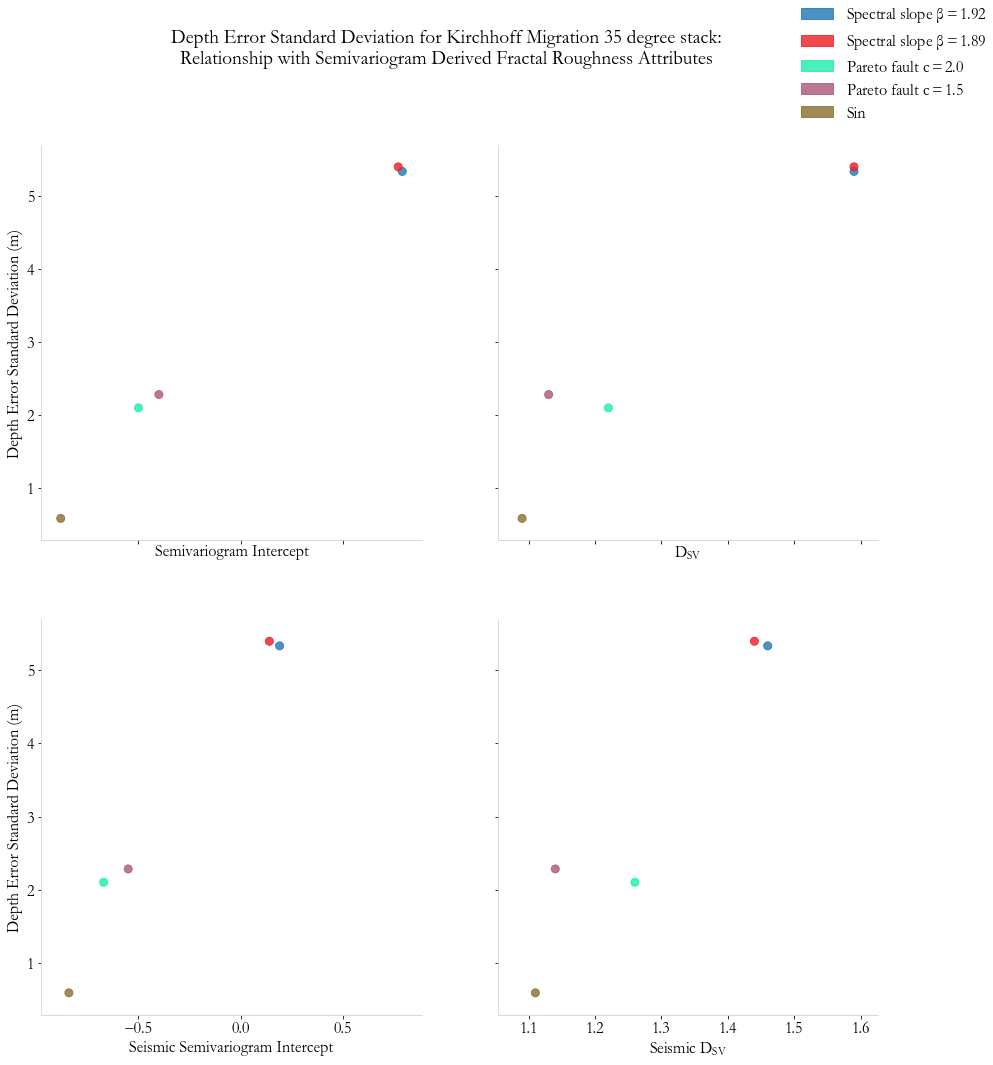

In [12]:
s =64
alpha = 0.8

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,16))  # 2x2 grid

ax[0, 0].scatter(df_input['Int_SV'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[1, 0].scatter(df_input['Int_SV_seis'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[0, 1].scatter(df_input['D_SV'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[1, 1].scatter(df_input['D_SV_seis'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)


# Set up legend:
patches = []
for i in range(5):
    patches.append( mpatches.Patch(color=colours[i], alpha=0.8, label=names[i])) 
               
# ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , frameon=False)
fig.legend(handles=patches,  loc='upper right', borderaxespad=0. , frameon=False)

# x axis labels
ax[0, 0].set_xlabel('Semivariogram Intercept')
ax[1, 0].set_xlabel('Seismic Semivariogram Intercept')
ax[0, 1].set_xlabel("$\mathregular{D_{SV}}$")
ax[1, 1].set_xlabel("Seismic $\mathregular{D_{SV}}$")

# y axis labels
ax[0, 0].set_ylabel('Depth Error Standard Deviation (m)')
ax[1, 0].set_ylabel('Depth Error Standard Deviation (m)')



# cosmetics
## Remove axis lines.
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
#         ax[i, j].spines['bottom'].set_visible(False)
#         ax[i, j].spines['left'].set_visible(False)
        
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_color('lightgrey')
        ax[i, j].spines['right'].set_color('lightgrey')
        ax[i, j].spines['bottom'].set_color('lightgrey')
        ax[i, j].spines['left'].set_color('lightgrey')
        


# plt.tight_layout()
fig.suptitle('Depth Error Standard Deviation for Kirchhoff Migration 35 degree stack:\nRelationship with Semivariogram Derived Fractal Roughness Attributes')

plt.show()

fig_name=location_out_plots + '_Depth_error_4x4_Kirchhoff_35deg'  +'.png'
fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight", dpi=1000)

Let's do the same thing for the madogram:

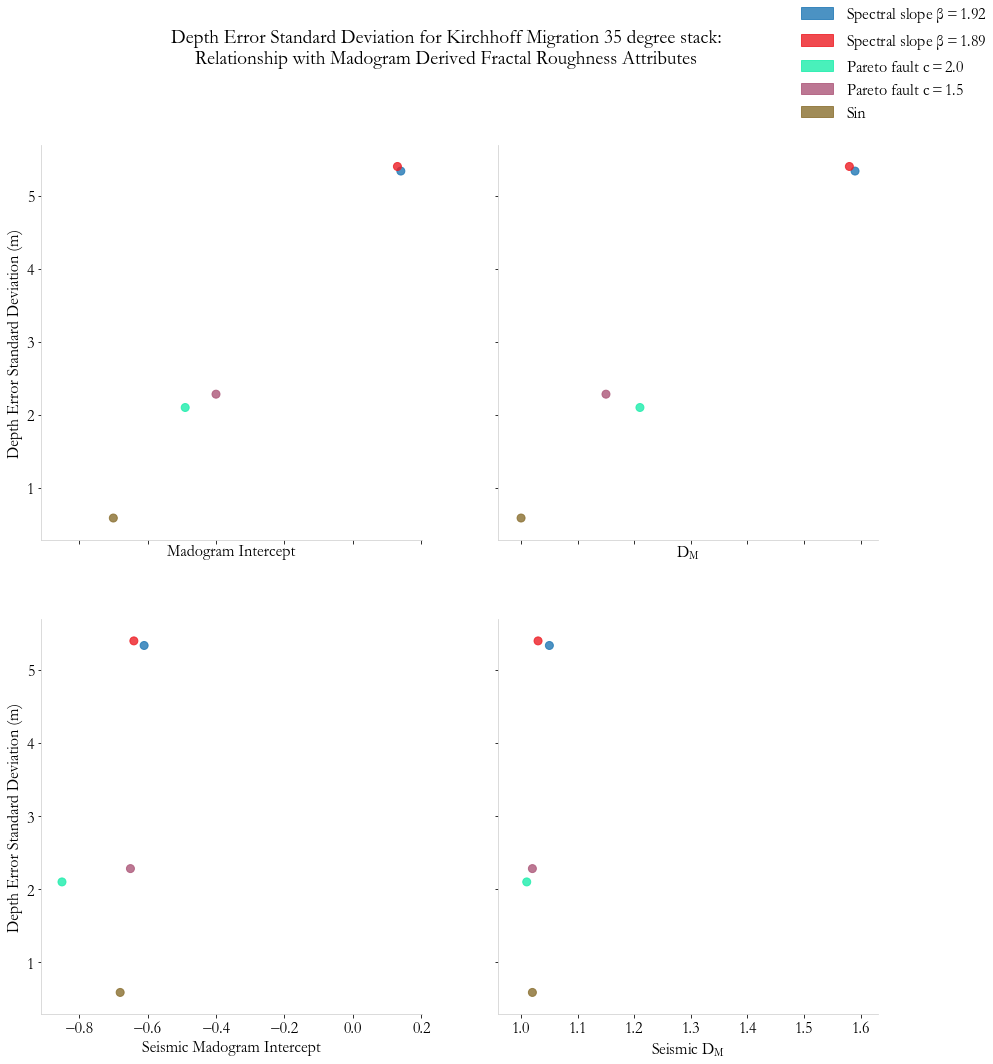

In [13]:
s =64
alpha = 0.8

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,16))  # 2x2 grid

ax[0, 0].scatter(df_input['Int_M'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[1, 0].scatter(df_input['Int_M_seis'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[0, 1].scatter(df_input['D_M'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)
ax[1, 1].scatter(df_input['D_M_seis'], df_input['Seis_-_Actual_std'], c=colours, s=s, alpha=alpha)


# Set up legend:
patches = []
for i in range(5):
    patches.append( mpatches.Patch(color=colours[i], alpha=0.8, label=names[i])) 
               
fig.legend(handles=patches,  loc='upper right', borderaxespad=0. , frameon=False)

# x axis labels
ax[0, 0].set_xlabel('Madogram Intercept')
ax[1, 0].set_xlabel('Seismic Madogram Intercept')
ax[0, 1].set_xlabel("$\mathregular{D_{M}}$")
ax[1, 1].set_xlabel("Seismic $\mathregular{D_{M}}$")

# y axis labels
ax[0, 0].set_ylabel('Depth Error Standard Deviation (m)')
ax[1, 0].set_ylabel('Depth Error Standard Deviation (m)')

# cosmetics
## Remove axis lines.
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
#         ax[i, j].spines['bottom'].set_visible(False)
#         ax[i, j].spines['left'].set_visible(False)
        
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_color('lightgrey')
        ax[i, j].spines['right'].set_color('lightgrey')
        ax[i, j].spines['bottom'].set_color('lightgrey')
        ax[i, j].spines['left'].set_color('lightgrey')
        


# plt.tight_layout()
fig.suptitle('Depth Error Standard Deviation for Kirchhoff Migration 35 degree stack:\nRelationship with Madogram Derived Fractal Roughness Attributes')

plt.show()

fig_name=location_out_plots + '_Madogram_Depth_error_4x4_Kirchhoff_35deg'  +'.png'
fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight", dpi=1000)

Regressions

In [14]:
# Do a regression for semivariongram case
res = stats.linregress(df_input['Int_SV'], df_input['Seis_-_Actual_std'])
print(res)

LinregressResult(slope=2.75064542892524, intercept=3.2627891770704704, rvalue=0.9963026453426231, pvalue=0.00026973016389390315, stderr=0.1369435075164472)


In [15]:
res.rvalue ** 2

0.9926189611167087

In [16]:
round(res.slope, 2), round(res.intercept, 2)

(2.75, 3.26)

In [17]:
# Do a regression for semivariongram case
res = stats.linregress(df_input['Int_SV_seis'], df_input['Seis_-_Actual_std'])
print(res)

LinregressResult(slope=4.424724806993743, intercept=4.672715561417595, rvalue=0.9908077047861794, pvalue=0.0010565013876849268, stderr=0.34878909720937995)


In [18]:
res.rvalue ** 2

0.9816999078636568

In [19]:
round(res.slope, 2), round(res.intercept, 2)

(4.42, 4.67)

In [20]:
# Do a regression for semivariongram case
res = stats.linregress(df_input['Int_M'], df_input['Seis_-_Actual_std'])
print(res)

LinregressResult(slope=5.60326292199557, intercept=4.62102218960459, rvalue=0.9978183876561145, pvalue=0.0001222807406257126, stderr=0.2140403563363129)


In [21]:
res.rvalue ** 2

0.995641534744648

In [22]:
round(res.slope, 2), round(res.intercept, 2)

(5.6, 4.62)

In [23]:
# Do a regression for semivariongram case
res = stats.linregress(df_input['Int_M_seis'], df_input['Seis_-_Actual_std'])
print(res)

LinregressResult(slope=10.932244431381456, intercept=10.641280458125438, rvalue=0.4866141222912915, pvalue=0.40582734155312494, stderr=11.331439474000955)


In [24]:
res.rvalue ** 2

0.23679330401332396

In [25]:
round(res.slope, 2), round(res.intercept, 2)

(10.93, 10.64)